In [28]:
import simulation
import functions
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
import os
import pickle_readers
# plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['font.size'] = 4
plt.rcParams['font.family'] = "Cambria"
jnp.set_printoptions(linewidth=200,precision=10,suppress=True)

In [4]:
dt = 0.05
# filepath = r"C:\Users\Malachi Landis\OneDrive - Northwestern University\Papers\CIRP 2025\Figures\adt_grey_200_smoothed.png"
# phi__N_N = functions._phi_img__N_N(filepath)
def get_density(theta_n):
    v_n = 2*np.sqrt(theta_n*(1-theta_n))
    v = 1.6*v_n
    a = 5.75
    b = -14.45
    c = 12.32
    rho = a*v**2 + b*v + c
    return rho
size = 100
width = 20
border = 5
ij = np.stack(np.meshgrid(np.arange(size-2*border),np.arange(size-2*border),indexing='ij'),axis=-1)
angles = 1 - 2*np.arctan2(ij[:,:,0],ij[:,:,1])/np.pi
densities = get_density(angles)
distances = np.sqrt(np.sum(np.square(ij - np.zeros(2)[None,None,:]),axis=-1))
points = densities * (distances > (size-width-2*border))
points = points * (distances < size-2*border)
blank = np.zeros((size,size))
blank[border:-border,border:-border] = points
dxdy = size**2
phi__N_N = dxdy * blank / np.sum(blank) 

# functional arc K = 40, n = 5
# arc de triomphe K = 30, n = 15
sim = simulation.simulation(phi__N_N,
                            domain_size=1000,
                            num_basis=40,
                            velocity_limit=75,
                            wheel_spacing=29.6,
                            mpc_horizon=5,
                            mpc_dt=dt,
                            mpc_step=0.1,
                            barrier_coefficient=250.0,
                            control_coefficient=0.0,
                            ergodic_coefficient=100.0,
                            sim_dt=dt)

In [5]:
textured_area = np.sum(points) / dxdy / 100 * 1000**2
dimple_area = np.pi * 0.170**2 / 4
dimples = textured_area / dimple_area
time_per_robot = dimples / 4 / 60 / 60 / 4
time_per_robot

7.841015731976812

In [6]:
# fig,ax = plt.subplots(2,2,layout="constrained")
# aspect = 10
# for i in range(2):
#     for j in range(2): 
#         ax[i,j].axis('off')
# im = ax[0,0].imshow(phi__N_N.T,origin='lower',cmap='gray')
# fig.colorbar(mappable=im, ax=ax[0,0])
# ax[0,0].set_title("Target Distribution")
# im = ax[0,1].imshow(sim.controller.B__N_N.T,origin='lower',cmap='gray')
# fig.colorbar(mappable=im, ax=ax[0,1])
# ax[0,1].set_title("Barrier Values")
# im = ax[1,0].imshow(sim.controller.dB__N_N_2[:,:,0].T,origin='lower')
# fig.colorbar(mappable=im, ax=ax[1,0])
# ax[1,0].set_title("Barrier X Gradient")
# im = ax[1,1].imshow(sim.controller.dB__N_N_2[:,:,1].T,origin='lower')
# fig.colorbar(mappable=im, ax=ax[1,1])
# ax[1,1].set_title("Barrier Y Gradient")
# fig.set_size_inches(2,2)

In [7]:
x_n_0__3 = jnp.array([0.6,0.6,1.0])
time_steps = 36000
save_every = 5
[dimples,
 x_traj,
 u_traj,
 t_traj,
 barrier_cost_traj,
 control_cost_traj,
 ergodic_cost_traj] = sim.run_simulation(time_steps=time_steps,
                                         save_every=save_every,
                                         dimple_every=5,
                                         x_n_0__3=x_n_0__3)

Progress: 0.0%
Progress: 0.013888888888888888%
Progress: 0.027777777777777776%
Progress: 0.041666666666666664%
Progress: 0.05555555555555555%
Progress: 0.06944444444444445%
Progress: 0.08333333333333333%
Progress: 0.09722222222222222%
Progress: 0.1111111111111111%
Progress: 0.125%
Progress: 0.1388888888888889%
Progress: 0.1527777777777778%
Progress: 0.16666666666666666%
Progress: 0.18055555555555555%
Progress: 0.19444444444444445%
Progress: 0.20833333333333334%
Progress: 0.2222222222222222%
Progress: 0.2361111111111111%
Progress: 0.25%
Progress: 0.2638888888888889%
Progress: 0.2777777777777778%
Progress: 0.2916666666666667%
Progress: 0.3055555555555556%
Progress: 0.3194444444444444%
Progress: 0.3333333333333333%
Progress: 0.3472222222222222%
Progress: 0.3611111111111111%
Progress: 0.375%
Progress: 0.3888888888888889%
Progress: 0.4027777777777778%
Progress: 0.4166666666666667%
Progress: 0.4305555555555556%
Progress: 0.4444444444444444%
Progress: 0.4583333333333333%
Progress: 0.472222222

In [8]:
# cwd = os.getcwd()
# save_folder = os.path.join(os.path.join(cwd,"Prior_Runs"),"pattern_arc")
# pickle_path = os.path.join(save_folder,"Positions_History.pickle")
# reader = pickle_readers.positions_reader(pickle_path)
# result = reader.read()

In [9]:
# fig,axes = plt.subplot_mosaic(layout="constrained",
#     mosaic = [["sim", "data"]]
# )
# fig.get_layout_engine().set(w_pad=0,h_pad=1/72,hspace=0,wspace=0)
# fig.set_size_inches(2.5,1.25)

# for i in range(1):
#     axes["sim"].plot(x_traj[:,0],x_traj[:,1],linewidth=0.01,c='black',alpha=1)
# axes["sim"].set_title("Simulated 1-robot trajectory, 5 hours",pad=2)
# axes["sim"].set_xlim([0,1])
# axes["sim"].set_ylim([0,1])
# axes["sim"].set_aspect('equal')
# axes["sim"].set_xticks([0,1])
# axes["sim"].set_yticks([0,1])
# axes["sim"].tick_params(length=2,pad=1)

# for i in range(1):
#     for each in result.values():
#         pos_x_array = (np.array(each["POS_X"])+500)/1000
#         pos_y_array = (np.array(each["POS_Y"])+500)/1000
#         axes["data"].plot(pos_x_array,pos_y_array,linewidth=0.01,c='black',alpha=1)
# axes["data"].set_title("5-robot position data, 1 hour",pad=2)
# axes["data"].set_xlim([0,1])
# axes["data"].set_ylim([0,1])
# axes["data"].set_aspect('equal')
# axes["data"].set_xticks([0,1])
# axes["data"].set_yticks([0,1])
# axes["data"].tick_params(length=2,pad=1)

Text(0, 0.5, 'Metric')

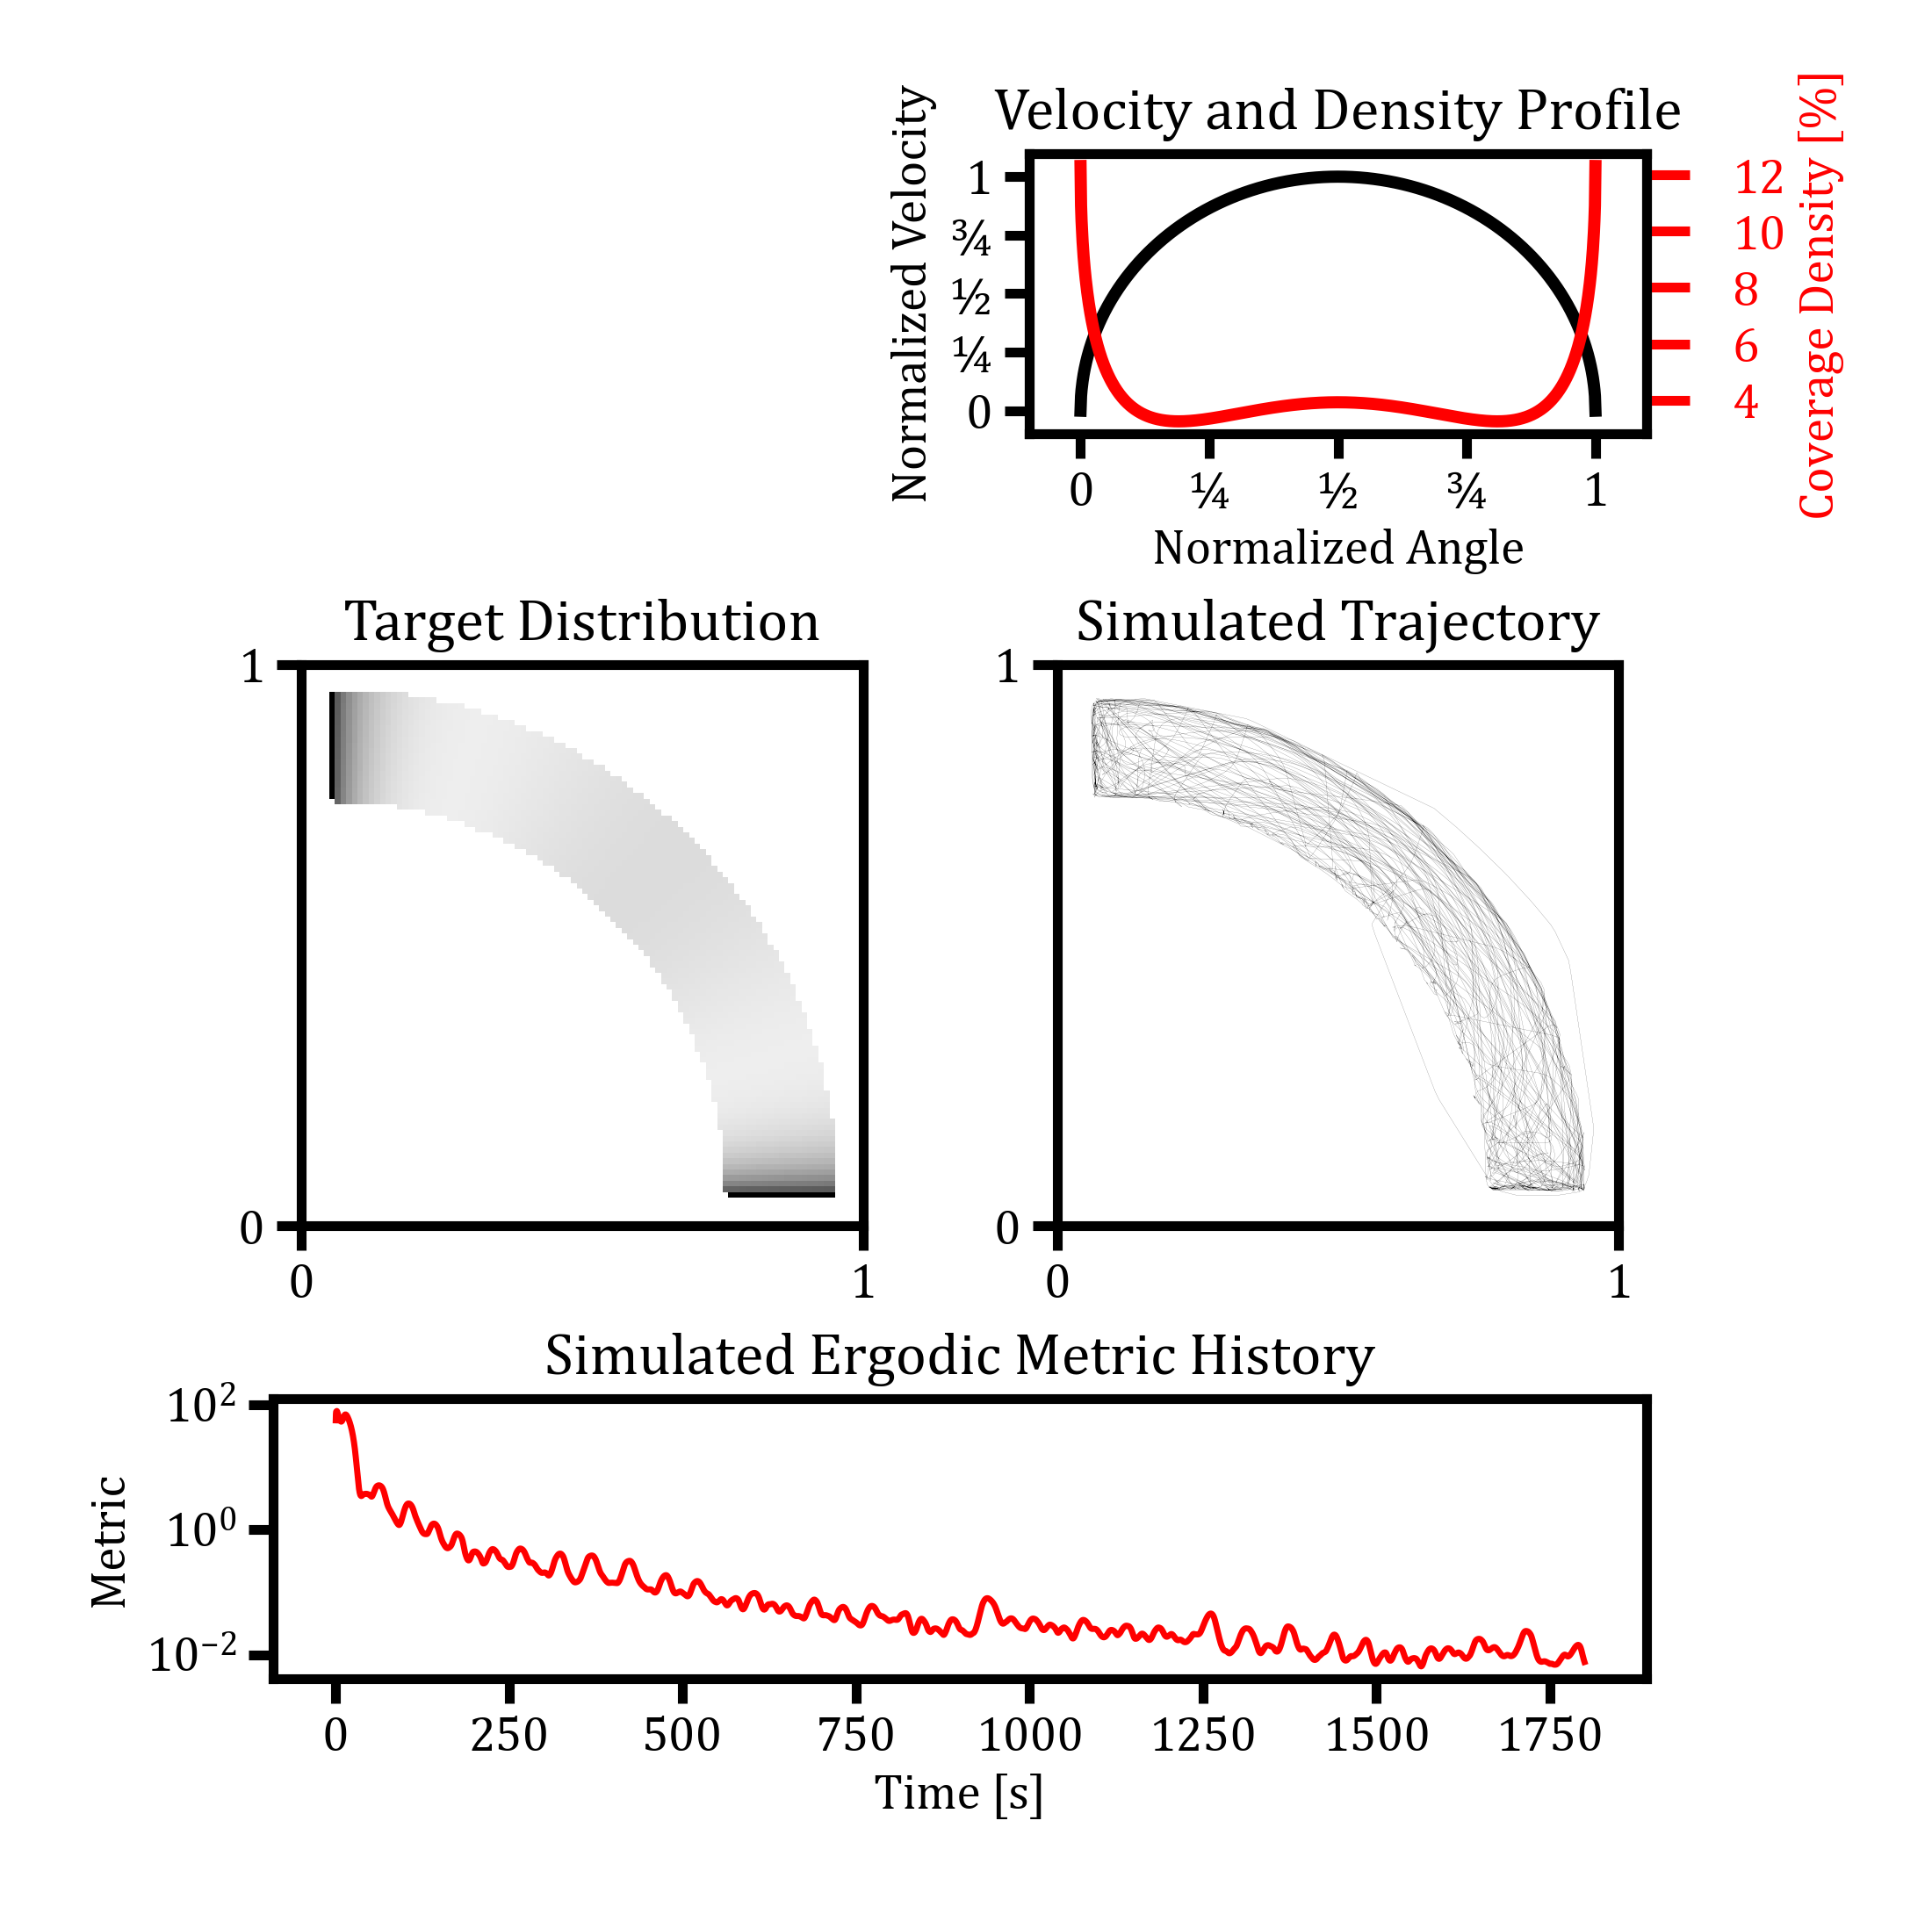

In [35]:
def get_density(theta_n):
    v_n = 2*np.sqrt(theta_n*(1-theta_n))
    v = 1.6*v_n
    a = 5.75
    b = -14.45
    c = 12.32
    rho = a*v**2 + b*v + c
    return rho

theta_n = np.linspace(0,1,1000)
v_n = 2*np.sqrt(theta_n*(1-theta_n))
rho = get_density(theta_n)

fig,axes = plt.subplot_mosaic(layout="constrained",
    mosaic = [["blank", "curves"],
              ["target", "sim"],
              ["metric", "metric"]],
    height_ratios=[0.5,1,0.5]
)
fig.get_layout_engine().set(w_pad=0,h_pad=1/72,hspace=0,wspace=0)
# fig.subplots_adjust(wspace=0.3,hspace=0.4)
fig.set_size_inches(2,2)

axes["blank"].axis('off')

ax_right = axes["curves"].twinx()
axes["curves"].plot(theta_n, v_n, linewidth=1.0, color='black')
ax_right.plot(theta_n, rho, linewidth=1.0, color='red')
axes["curves"].set_xlim([-0.1,1.1])
axes["curves"].set_ylim([-0.1,1.1])
axes["curves"].set_xticks([0,0.25,0.5,0.75,1])
axes["curves"].set_yticks([0,0.25,0.5,0.75,1])
axes["curves"].set_xticklabels(["0","¼","½","¾","1"])
axes["curves"].set_yticklabels(["0","¼","½","¾","1"])
axes["curves"].set_ylabel("Normalized Velocity",labelpad=1)
ax_right.set_ylabel("Coverage Density [%]",color='red',labelpad=1)
axes["curves"].set_xlabel("Normalized Angle",labelpad=1)
ax_right.tick_params(axis='y',color='red')
ax_right.set_yticks([4,6,8,10,12])
ax_right.set_yticklabels([4,6,8,10,12],color='red')
axes["curves"].tick_params(length=2,pad=1)
axes["curves"].set_title("Velocity and Density Profile",pad=2)

im = axes["target"].imshow(sim.controller.phi__N_N.T,origin='lower',cmap='gray_r',extent=[0,1,0,1],vmax=12.02,vmin=2.5)
axes["target"].set_title("Target Distribution",pad=2)
axes["target"].set_xlim([0,1])
axes["target"].set_ylim([0,1])
axes["target"].set_xticks([0,1])
axes["target"].set_yticks([0,1])
axes["target"].tick_params(length=2,pad=1)

for i in range(1):
    axes["sim"].plot(x_traj[:,0],x_traj[:,1],linewidth=0.01,c='black',alpha=1)
axes["sim"].set_title("Simulated Trajectory",pad=2)
axes["sim"].set_xlim([0,1])
axes["sim"].set_ylim([0,1])
axes["sim"].set_xticks([0,1])
axes["sim"].set_yticks([0,1])
axes["sim"].set_aspect('equal')
axes["sim"].tick_params(length=2,pad=1)

# im = axes["sim"].imshow(sim.get_reconstruction_dimples().T,origin='lower',cmap='gray_r',extent=[0,1,0,1])
# axes["sim"].set_title("Sim. Reconstruction",pad=2)
# axes["sim"].set_xlim([0,1])
# axes["sim"].set_ylim([0,1])
# axes["sim"].set_xticks([0,1])
# axes["sim"].set_yticks([0,1])
# axes["sim"].tick_params(length=2,pad=1)

axes["metric"].semilogy(t_traj,ergodic_cost_traj,linewidth=0.5,c='red',alpha=1)
axes["metric"].set_title("Simulated Ergodic Metric History",pad=2)
axes["metric"].set_yticks([0.01,1,100])
axes["metric"].tick_params(length=2,pad=1)
axes["metric"].set_xlabel("Time [s]",labelpad=1)
axes["metric"].set_ylabel("Metric",labelpad=1)

In [11]:
def writeConstants(filename):
    with open(filename,"w") as file: # Open the file and overwrite any content
        file.write("#ifndef CONSTANTS_H\n")
        file.write("#define CONSTANTS_H\n")
        
        file.write("// ~~~ Demo Parameters ~~~ //\n")
        file.write("int   const TIME_STEPS = {};\n".format(time_steps))
        file.write("int   const SAVE_EVERY = {};\n".format(save_every))
        file.write("float const X_N_0 =      {};\n".format(x_n_0__3[0]))
        file.write("float const Y_N_0 =      {};\n".format(x_n_0__3[1]))
        file.write("float const TH_N_0 =     {};\n".format(x_n_0__3[2]))
        file.write("float const SIM_DT =     {};\n".format(sim.sim_dt))

        file.write("// ~~~ Domain Parameters ~~~ //\n")
        file.write("int   const N =          {};\n".format(sim.controller.N))
        file.write("float const L =          {};\n".format(sim.controller.L))

        file.write("// ~~~ Robot Parameters ~~~ //\n")
        file.write("float const S_N =        {};\n".format(sim.controller.s_n))
        file.write("float const U_N_LIM =    {};\n".format(sim.controller.u_n_lim))

        file.write("// ~~~ Control Parameters ~~~ //\n")
        file.write("int   const K =          {};\n".format(sim.controller.K))
        file.write("int   const HORIZON =    {};\n".format(sim.controller.horizon))
        file.write("float const STEPSIZE =   {};\n".format(sim.controller.step))
        file.write("float const MPC_DT =     {};\n".format(sim.controller.mpc_dt))
        file.write("float const U_N_INIT =   {};\n".format(sim.controller.u_n_init[0]))
        file.write("float const B_COEF =     {};\n".format(sim.controller.B_coef))
        file.write("float const D_COEF =     {};\n".format(sim.controller.D_coef))
        file.write("float const E_COEF =     {};\n".format(sim.controller.E_coef))

        file.write("// ~~~ Target Statistics ~~~ //\n")
        file.write("float phik__K_K[K*K] =   {")
        for j in range(sim.controller.K):
            for i in range(sim.controller.K):
                file.write("{},".format(sim.controller.phik__K_K[i,j]))
            file.write("\n                          ")
        file.write("};\n")

        file.write("// ~~~ Barrier Function ~~~ //\n")
        file.write("char dB__N_N[N*N] =     {")
        for j in range(sim.controller.N):
            for i in range(sim.controller.N):
                file.write("{},".format(sim.controller.dB__N_N[i,j]))
            file.write("\n                           ")
        file.write("};\n")

        file.write("#endif")

In [12]:
filename = r"C:\Users\Malachi Landis\OneDrive - Northwestern University\Papers\CIRP 2025\Code\Operation\Common\constants.hpp"
# writeConstants(filename)

In [13]:
# from matplotlib.animation import FuncAnimation

# chunk_size = 1000

# fig, ax = plt.subplots()
# scat = ax.scatter([], [], marker='o',edgecolors='none',c='k')
# ax.set_aspect("equal")

# ax.set_xlim(0, 500)
# ax.set_ylim(0, 500)

# def generate_color(index):
#     return plt.cm.rainbow(np.arange(index)/save_points)

# def update(frame):
#     current_data = x_traj[:chunk_size*frame+1]
#     scat.set_offsets(current_data)
#     # scat.set_color(generate_color(chunk_size*frame))
#     scat.set_sizes(0.1*np.ones(chunk_size*frame))
#     # scat.set_linewidths(np.zeros(chunk_size*frame))
#     return scat,

# ani = FuncAnimation(fig, update, frames=int(save_points/chunk_size), interval=50, repeat=False)

# ani.save('IROS_gazelle.gif', writer='imagemagick', savefig_kwargs={"transparent": True})


In [14]:
# filenames = ["x","u","E","ck"]
# outputs = []
# for file in filenames:
#     with open("../Common/Demo_Outputs/"+file+".out",'rb') as f:
#         outputs.append(np.fromfile(f, dtype=np.float32))
#         f.close()
# save_points = int(time_steps / save_every)

# x_cpp =    outputs[0].reshape(save_points,3)
# u_cpp =    outputs[1].reshape(save_points,2)
# E_cpp =    outputs[2]
# ck_cpp =   outputs[3].reshape(sim.controller.K,sim.controller.K,order='F')

# fig,ax = plt.subplots(2,4,width_ratios=[1,1,1,3],layout='constrained')
# for i in range(2): 
#     for j in range(4):
#         ax[i,j].axis('off')
# im = ax[0,0].imshow(sim.controller.phi__N_N.T,origin='lower',cmap='gray',extent=[0,1,0,1])
# fig.colorbar(mappable=im, ax=ax[0,0], aspect=5)
# ax[0,0].scatter(x_traj[:,0],
#                 x_traj[:,1],s=1,cmap=plt.cm.rainbow,c=t_traj)
# ax[0,0].set_title("Python Trajectory")
# im = ax[0,1].imshow(sim.controller.ck__K_K.T,origin='lower')
# fig.colorbar(mappable=im, ax=ax[0,1], aspect=5)
# ax[0,1].set_title("Python ck")
# im = ax[0,2].imshow(sim.controller.ck__K_K.T - ck_cpp.T,origin='lower')
# fig.colorbar(mappable=im, ax=ax[0,2], aspect=5)
# ax[0,2].set_title("ck diff")
# im = ax[0,3].semilogy(t_traj, ergodic_cost_traj, c="red")
# ax[0,3].axis('on')
# ax[0,3].sharex(ax[1,3])
# ax[0,3].set_title("Python Ergodic Cost History")

# im = ax[1,0].imshow(sim.controller.phi__N_N.T,origin='lower',cmap='gray',extent=[0,1,0,1])
# fig.colorbar(mappable=im, ax=ax[1,0], aspect=5)
# ax[1,0].scatter(x_cpp[:,0],
#                 x_cpp[:,1],s=1,cmap=plt.cm.rainbow,c=t_traj)
# ax[1,0].set_title("CPP Trajectory")
# im = ax[1,1].imshow(ck_cpp.T,origin='lower')
# fig.colorbar(mappable=im, ax=ax[1,1], aspect=5)
# ax[1,1].set_title("CPP ck")
# im = ax[1,3].semilogy(t_traj, E_cpp, c="red")
# ax[1,3].axis('on')
# ax[1,3].set_title("CPP Ergodic Cost History")
# ax[1,3].set_xlabel("Time [s]")